In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pathlib import Path
%matplotlib inline

In [2]:
file_fath = '/content/cad_jpy.csv'
yen = pd.read_csv(file_fath,index_col='Date',infer_datetime_format=True,parse_dates=True)
yen.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen = yen.loc['1990-01-01':,:]
yen.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [4]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s

yen['return'] = yen.Price.pct_change() * 100
yen.tail()

,Price,Open,High,Low,return
Date,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697
2020-06-01,79.27,78.21,79.36,78.04,1.251756
2020-06-02,80.40,79.26,80.56,79.15,1.425508
2020-06-03,80.70,80.40,80.82,79.96,0.373134
2020-06-04,80.71,80.80,80.89,80.51,0.012392


In [5]:
# Create a lagged return using the shift function

yen['lagged_return'] = yen['return'].shift()

yen = yen.replace(-np.inf,np.nan).dropna()

yen.tail()

,Price,Open,High,Low,return,lagged_return
Date,,,,,,
2020-05-29,78.29,78.21,78.41,77.75,0.076697,-0.114913
2020-06-01,79.27,78.21,79.36,78.04,1.251756,0.076697
2020-06-02,80.40,79.26,80.56,79.15,1.425508,1.251756
2020-06-03,80.70,80.40,80.82,79.96,0.373134,1.425508
2020-06-04,80.71,80.80,80.89,80.51,0.012392,0.373134


In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training

train = yen[:'2017']
test = yen['2018':]

In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable)


x_train = train['lagged_return'].to_frame()
x_test = test['lagged_return'].to_frame()
y_train = train['return']
y_test = test['return']

In [8]:
# Preview the X_train data

x_train.head()

,lagged_return
Date,
1990-01-04,-0.846720
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901


In [9]:
# Display top rows for y_train

y_train.head()

Date
1990-01-04   -1.468476
1990-01-05    0.874777
1990-01-08   -0.216798
1990-01-09    0.667901
1990-01-10    0.567546
Name: return, dtype: float64

In [10]:
# Create a Linear Regression model and fit it to the training data

from sklearn.linear_model import LinearRegression

In [11]:
# Fit a SKLearn linear regression using  just the training set (X_train, Y_train)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Make a prediction of "y" values using just the test dataset
prediction = model.predict(x_test)

In [15]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe

Results = y_test.to_frame()
Results['Predidicted Results'] = prediction

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f767c350110>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

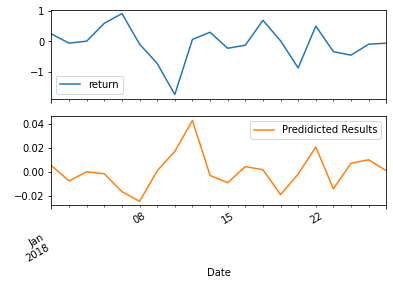

In [23]:
# Plot the first 20 predictions vs the true values
plt.figure(figsize=(20,20))
Results[:20].plot(subplots=True)

In [24]:
def figure(plot):
    plot = Results[:20].plot(subplots=True)

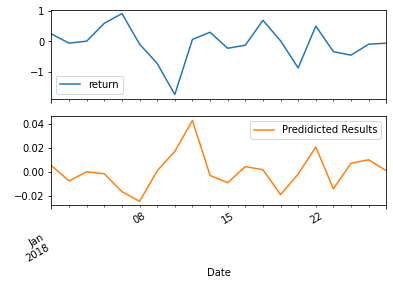

In [25]:
figure(Results)

In [26]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(
    Results['return'],
    Results['Predidicted Results']
)

rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.6445805658569028


In [29]:
# Construct a dataframe using just the "y" training data

in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe

in_sample_results['In-sample Predictions'] = model.predict(x_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)

in_sample_mse = mean_squared_error(
    in_sample_results["return"],
    in_sample_results["In-sample Predictions"]
)


# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)


in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.841994632894117


In [30]:
# Conclusions
print("CONCLUSIONS")
print("----------------------------")
# Question: Does this model perform better or worse on out-of-sample data as compared to in-sample data?
print("Does this model perform better or worse on out-of-sample data as compared to in-sample data?")
print("The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case.")


CONCLUSIONS
----------------------------
Does this model perform better or worse on out-of-sample data as compared to in-sample data?
The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case.


In [31]:
results = Path(r"F:\regression_analysis_conclusion.txt")
with open(results,'w') as file:
    file.write("CONCLUSIONS\n")
    file.write("----------------------------\n")
    file.write("Does this model perform better or worse on out-of-sample data as compared to in-sample data?\n")
    file.write("The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case.\n")